<a href="https://colab.research.google.com/github/badl7/heart_disease-ML_project/blob/main/proje1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
# EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-Learn models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score,f1_score
from sklearn.metrics import recall_score, plot_roc_curve, roc_curve,roc_auc_score

#**Loading Dataset**

 There are 13 attributes:


1. **age:** age in years
2.  **sex:** sex (1 = male; 0 = female)
3.  **cp:** chest pain type
          -- Value 0: typical angina
          -- Value 1: atypical angina
          -- Value 2: non-anginal pain
          -- Value 3: asymptomatic
4. **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
5.  **chol:** serum cholestoral in mg/dl
6. **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg:** resting electrocardiographic results
          -- Value 0: normal
          -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
          -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach:** maximum heart rate achieved
9. **exang:** exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** = ST depression induced by exercise relative to rest
11. **slope:** the slope of the peak exercise ST segment
          -- Value 0: upsloping
          -- Value 1: flat
          -- Value 2: downsloping
12. **ca:** number of major vessels (0-3) colored by flourosopy
13. **thal:** 0 = normal; 1 = fixed defect; 2 = reversable defect and the label
  
   **condition:** 0 = no disease, 1 = disease




In [139]:
data = pd.read_csv("/content/heart_cleveland_upload.csv")
df = data.copy()

#**Data Exploration (EDA)**



> Take a closer look at the dataset you're working with by learning more about the data.



In [140]:
# The head() method returns the first 5 lines of df by default.

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [141]:
#In order to get overall info about the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [142]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64



> We have quite similar amount of both classes which means our classfication is balanced!



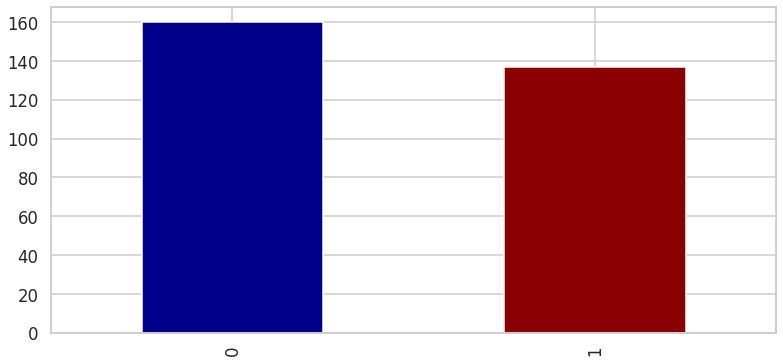

In [143]:
# To visualize:

df['condition'].value_counts().plot(kind='bar' , color=['darkblue','darkred'])

In [144]:
#To view basic statistical details about dataset:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


**Heart Disease Frequency According To Maximum Heart Rate Achieved**



In [195]:
df.thalach.values

array([131, 151, 114, 174, 144, 155, 150, 145, 171, 145, 159, 125, 162,
       162, 162, 190, 178, 125, 132, 178, 178, 182, 174, 121, 162, 143,
       120, 179, 103, 140, 164, 160, 152, 174, 141, 164, 169, 153, 178,
       163, 161, 155, 166, 156, 159, 195, 172, 158, 184, 162, 162, 171,
       168, 180, 156, 172, 175, 138, 170, 173, 188, 170, 162, 132, 172,
       168, 153, 163, 182, 174, 192, 202, 116, 130, 112, 146, 150, 115,
       151, 160, 150, 172, 152, 157, 148, 151, 131, 158, 133, 172, 146,
        97, 137, 155, 160,  96, 134, 157, 165, 154, 173, 172, 165, 150,
       174, 173, 142, 152, 147, 158, 170, 165, 167, 163, 152, 173, 169,
       162, 143, 166, 123, 142, 149, 154, 157, 158, 163, 163, 139, 126,
       139, 175, 156, 152, 179, 160, 147, 175, 149, 179, 180, 169, 165,
       162, 194, 173, 150, 168, 179, 172, 152, 182, 179, 187, 170, 162,
       125, 125, 109, 141, 108, 129, 163, 125,  71, 142, 151, 165, 132,
       138, 114, 127, 140, 158,  96, 132, 122, 105, 154, 147, 15

Text(0, 0.5, 'Heart disease(condition)')

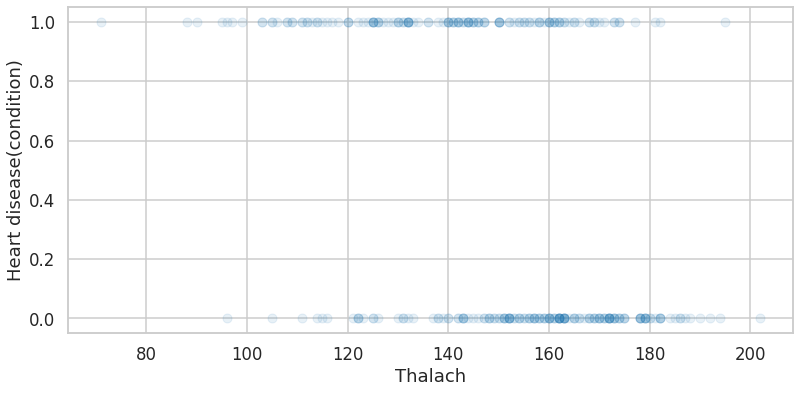

In [204]:
plt.plot(df.thalach, df.condition, 'o', alpha=0.1,label='Data')


plt.xlabel("Thalach")
plt.ylabel("Heart disease(condition)")

**Heart Disease Frequency According To Resting Electrocardiographic Results**

**restecg:** resting electrocardiographic results
*  Value 0: normal
*  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [145]:
df['restecg'].value_counts()

0    147
2    146
1      4
Name: restecg, dtype: int64



> **Crosstab :** It computes a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors.



In [146]:
pd.crosstab(df['restecg'],df['condition'])

condition,0,1
restecg,,
0,92,55
1,1,3
2,67,79


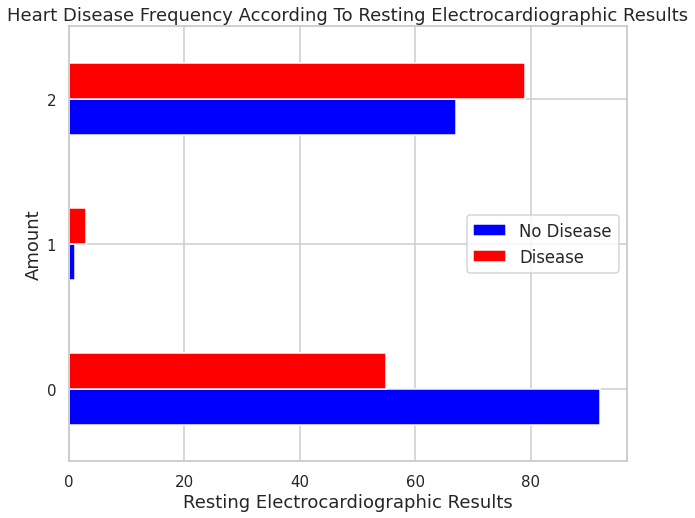

In [147]:
# To make the crosstab more visual:

pd.crosstab(df['restecg'],df.condition).plot(kind = 'barh',
                                        figsize = (10,8),
                                        color = ['blue','red'],fontsize=15)
                                        
                                        

plt.title("Heart Disease Frequency According To Resting Electrocardiographic Results");
plt.xlabel("Resting Electrocardiographic Results")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])

**Correlation Matrix**

 

> Correlation martix gives us correlation of each variable with each of other variables present in the dataframe. To calculate correlation, we first calculate the covariance between two variables and then covariance is divided by the product of standard deviation of same two variables. Correlation has no units so it is easy to compare correlation coeffient.



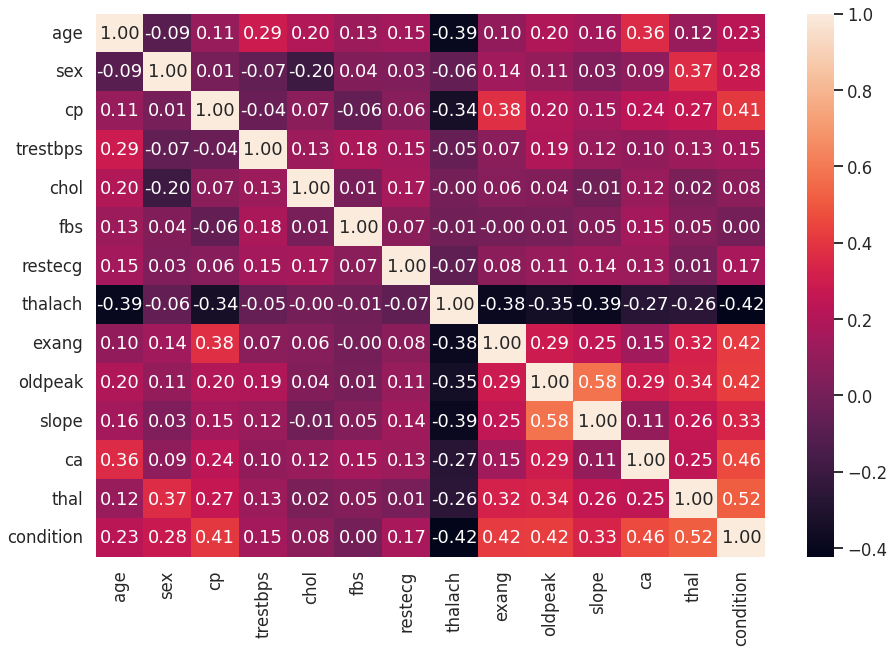

In [193]:
#Visualizing the Dataset variables and Correlation between them:

corr = df.corr()
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.heatmap(corr, annot=True,
                 fmt='.2f')

# **Modelling**

In [149]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [150]:
# The tail() method returns the last 5 lines of the df by default.

df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [151]:
# Split data into X and y:

X = df.drop('condition', axis=1)
y = df['condition']

In [152]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [153]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64

In [154]:
# Split data into train and test sets:

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    random_state=42)

In [155]:
print(f"Shape of X Train: {X_train.shape}\nShape of y Train: {y_train.shape}\nShape of X Test: {X_test.shape}\nShape of y Test: {y_test.shape}")

Shape of X Train: (237, 13)
Shape of y Train: (237,)
Shape of X Test: (60, 13)
Shape of y Test: (60,)


In [156]:
#We are going to use 3 different(LR,KNN,Random Forest) machine learning models:
models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier()
}
def fit_and_score(models,X_train,y_train,X_test,y_test):
    """Fits and evaluates given machine learning models"""
    model_scores = {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [157]:
model_scores =  fit_and_score(models,
                            X_train = X_train,
                           y_train = y_train,
                           X_test = X_test,
                           y_test = y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.7166666666666667}

**Model Comparison**

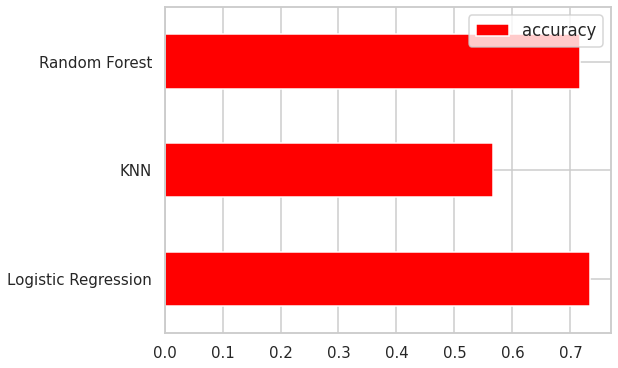

In [158]:
model_compare  = pd.DataFrame(model_scores,index = ['accuracy'])
model_compare.T.plot(kind = 'barh',
                     figsize = (8,6),
                     color = ['red'],fontsize=15)

# **Hyperparameter Tuning**


*   Hand
*   RandomizedSearchCV
*  GridSearchCV



**K-Nearest Neighbors**
    



In [187]:
train_scores = []
test_scores = []

neighbors = range(1,20)

knn = KNeighborsClassifier()


for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Text(0.5, 0, 'Number of Neighbors')

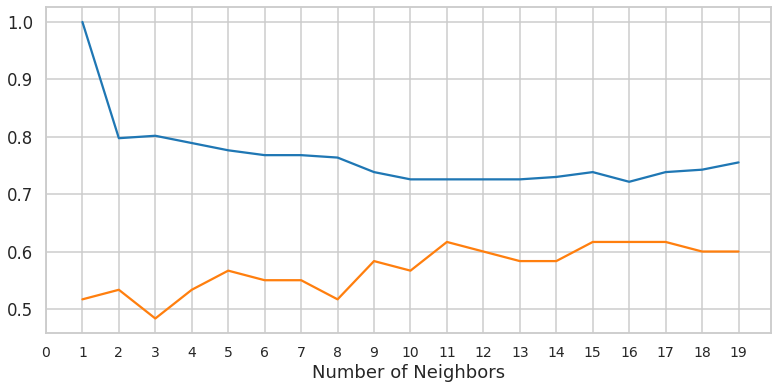

In [188]:
# To visualize train and test scores

plt.plot(neighbors, train_scores, label = 'Train Scores')
plt.plot(neighbors, test_scores , label = 'Test Scores')

plt.xticks(np.arange(0,20,1),fontsize=14)
plt.xlabel("Number of Neighbors")

In [190]:
print(f"Maximum KNN Score on the test data is {max(test_scores):.4f}")

Maximum KNN Score on the test data is 0.6167


In [189]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6166666666666667



> **Eventhough we fine tuned the KNN model the score is not close to ones that we got with Logistic Regression and Random Forest Classifier. Therefore, from now on we try to fine tune Logistic regression and random forest classifiers.**



**Hyperparameter Tuning With 
RandomizedSearchCV and GridSearchCV**

We're going to tune:

  

*   LogisticRegression()
*   RandomForestClassifier()


But for you to see both GridSearchCV and RandomizedSearchCV we will use both.

(RandomizedSearchCV for LogisticRegression and GridSearchCV for RandomForestClassifier.)

  \\


**RandomizedSearchCV for LogisticRegression**





 The grid search approach is fine when you are exploring relatively few combinations but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead. This class can be used in much the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.



In [163]:
# Create a hyperparameter grid for LogisticRegression:

lr_grid  = {'C':np.logspace(-5,5,25),'class_weight': ['balanced', None],
                'solver': ['liblinear']}

In [164]:
# Setup random hyperparameter search for LogisticRegression:

lr = LogisticRegression()
randoms_lr = RandomizedSearchCV(estimator=lr,
                                param_distributions=lr_grid, 
                                cv=7)

# Fit random hyperparameter search for LogisticRegression:

randoms_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-05, 2.61015722e-05, 6.81292069e-05, 1.77827941e-04,
       4.64158883e-04, 1.21152766e-03, 3.16227766e-03, 8.25404185e-03,
       2.15443469e-02, 5.62341325e-02, 1.46779927e-01, 3.83118685e-01,
       1.00000000e+00, 2.61015722e+00, 6.81292069e+00, 1.77827941e+01,
       4.64158883e+01, 1.21152766e+02, 3.16227766e+02, 8.25404185e+02,
       2.15443469e+03, 5.62341325e+03, 1.46779927e+04, 3.83118685e+04,
       1.00000000e+05]),
                                        'class_weight': ['balanced', None],
                                        'solver': ['liblinear']})

In [165]:
# Find the best hyperparameters:

randoms_lr.best_params_

{'solver': 'liblinear', 'class_weight': None, 'C': 0.14677992676220705}

In [166]:
# Evaluate the randomized search LogisticRegression model:

randoms_lr.best_estimator_.score(X_test,y_test)

0.7333333333333333



> **Although we have changed the parameter, the score value is the same as the value we found before.**




**GridSearchCV for RandomForestClassifier**

In [167]:
# Create a hyperparameter grid for RandomForestClassifier:

rfc_grid = {'n_estimators': np.arange(10,100,10),
            'max_depth' : [3,5,10],
            'min_samples_split' : np.arange(2,20,5)}

In [168]:
# Setup a hyperparameter search for RandomForestClassifier:

grids_rfc = GridSearchCV(RandomForestClassifier(),
                    param_grid= rfc_grid,
                    cv=3)

# Fit the hyperparameter search for RandomForestClassifier:

grids_rfc.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': array([ 2,  7, 12, 17]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [169]:
# Find the best hyperparameters:

grids_rfc.best_params_

{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 20}

In [170]:
# Evaluate the grid search RandomForestClassifier model:

grids_rfc.best_estimator_.score(X_test,y_test)

0.7666666666666667

# **Evaluating the Models**


*   Confusion Matrix
*   Classification Report
*   Precision
*   Recall
*   F1-score



In [171]:
# Make predictions on the tuned model:

y_preds = grids_rfc.best_estimator_.predict(X_test)
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [172]:
len(y_preds)

60

**Confusion Matrix**

Confusion matrix compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

 (X axis =model predictions, y axis = true labels)

Text(37.5, 0.5, 'True Labels')

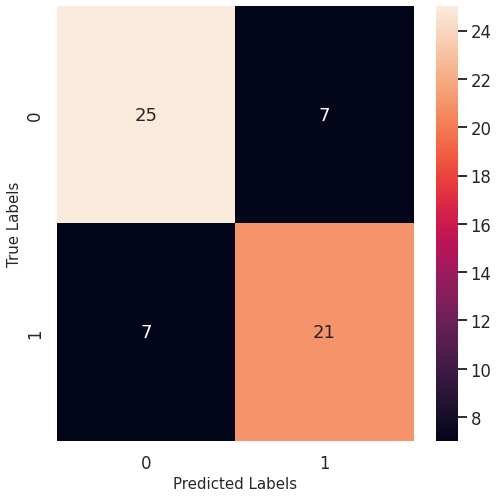

In [173]:
fig,ax = plt.subplots(figsize = (8,8))

ax = sns.heatmap(confusion_matrix(y_test,y_preds),linecolor='black',
                annot = True)

plt.xlabel("Predicted Labels",fontsize=15)
plt.ylabel("True Labels" ,fontsize=15)

**Classification Report**

In [174]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.75      0.75      0.75        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



**Calcualting Evaluation Metrics Using Cross-Validation**

▶ We're going to calculate accuracy,precision,recall and F1-score of our model using cross validation





In [175]:
grids_rfc.best_params_

{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 20}

In [176]:
# Let's create a model with the best parameters of our tuned model:

rfc = RandomForestClassifier(max_depth = 5,
                           min_samples_split= 2,
                           n_estimators = 20)

In [177]:
# cross-validated accuracy:

cv_acc = cross_val_score(rfc,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

# Take the average of the accuracy values:

cv_acc = cv_acc.mean()
cv_acc

0.7509604519774011

In [178]:
# cross-validated precision:

cv_prec = cross_val_score(rfc,
                        X,
                        y,
                        cv=5,
                        scoring='precision')

# Take the average of the precision values:

cv_prec = cv_prec.mean()
cv_prec

0.7916937229437229

In [179]:
# cross-validated recall:

cv_rec = cross_val_score(rfc,
                        X,
                        y,
                        cv=5,
                        scoring='recall')

# Take the average of the recall values:

cv_rec = cv_rec.mean()
cv_rec

0.7187830687830689

In [180]:
# cross-validated f1-score:

cv_f1 = cross_val_score(rfc,
                        X,
                        y,
                        cv=5,
                        scoring='f1')

# Take the average of the f1 values:

cv_f1 = cv_f1.mean()
cv_f1

0.6389315258137007

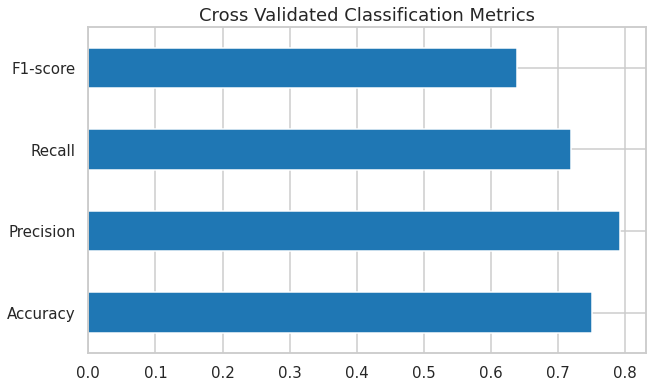

In [194]:
# To visualize cross validated metrics:

cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision': cv_prec,
                          'Recall': cv_rec,
                          'F1-score':cv_f1},index = [0])

cv_metrics.T.plot.barh(title = 'Cross Validated Classification Metrics',fontsize=15,figsize = (10,6),
                     legend = False);

**The ROC Curve**


> The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR).



In [182]:
#To plot the ROC curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

fpr, tpr, thresholds = roc_curve(y_test, y_preds)

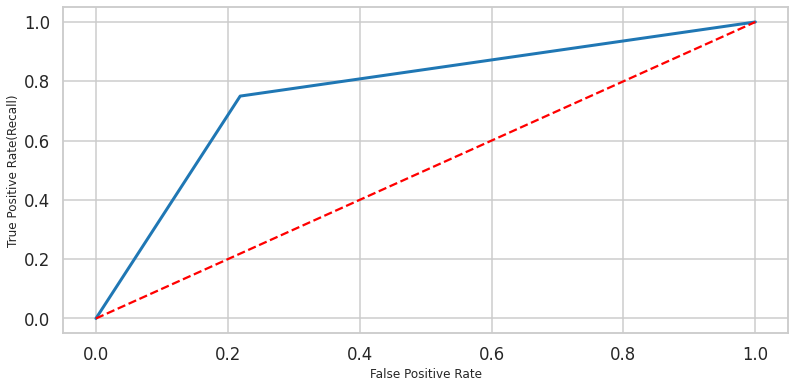

In [183]:
#Then the plot the FPR against the TPR using Matplotlib:

def plot_roc_curve(fpr, tpr, label='ROC'):
  plt.plot(fpr, tpr, linewidth=3, label=label)
  plt.plot([0, 1], [0, 1], 'r--') # Dashed diagonal

  plt.xlabel("False Positive Rate", fontsize=12)
  plt.ylabel("True Positive Rate(Recall)", fontsize=12)

plot_roc_curve(fpr, tpr)
plt.show()

**Feature Importance**

▶ Feature Importance is another way of asking, "which features contributed most to the outcomes of the model?"



In [184]:
# Fit an instance of Random Forest Classifier:

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [185]:
# Check feature importances:

rfc.feature_importances_

array([0.07749512, 0.03765776, 0.10271361, 0.06738239, 0.04137978,
       0.00775311, 0.01617983, 0.1564422 , 0.04831793, 0.09980768,
       0.02093897, 0.11803756, 0.20589406])

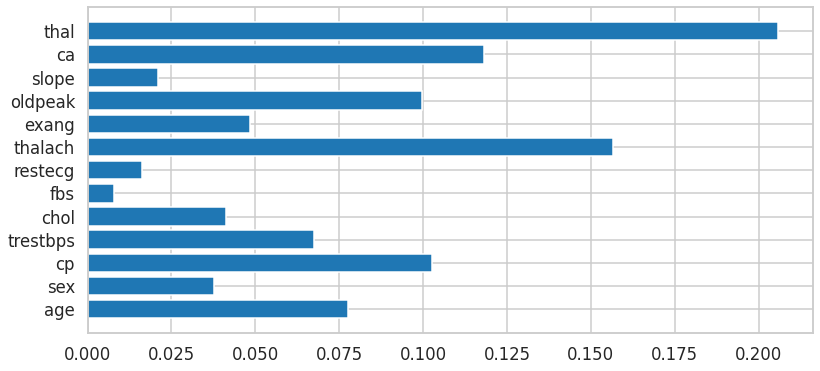

In [186]:
# Let's plot the importances: 

plt.barh(X.columns,rfc.feature_importances_);


**thal is feature most importance**

> **thal:** 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

> **ca:**  number of major vessels (0-3) colored by flourosopy




> **thalach:** maximum heart rate achieved



